Data Cleaning and Preprocessing 

Importing requirments from multiple platforms  

In [299]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import Imputer
%matplotlib inline

count    617.000000
mean       1.230146
std        1.263447
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: target, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


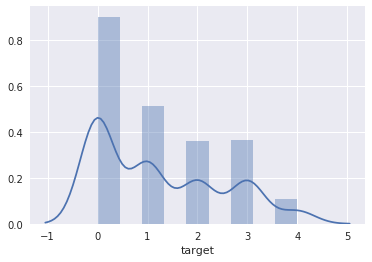

In [302]:
dataset= pd.read_csv('data.csv')
print dataset['target'].describe()
print sns.distplot(dataset['target']);

In [303]:
dataset.columns

Index([u'_id', u'ccf', u'age', u'sex', u'pain location', u'pain w exertion',
       u'relieved after rest', u'chest pain type', u'resting bp s',
       u'hypertension', u'cholesterol', u'fasting blood sugar', u'resting ecg',
       u'ekg month', u'ekg day', u'ekg yr', u'digitalis', u'beta blocker',
       u'nitrates', u'calcium channel blocker', u'diuretic',
       u'exercise protocol', u'duration of exercise', u'thaltime',
       u'mets achieved', u'max heart rate', u'resting heart rate',
       u'peak exercise bp 1', u'peak exercise bp 2', u'dummy 1',
       u'resting bp d', u'exercise angina', u'xhypo', u'oldpeak',
       u'ST height at rest', u'ST heaight at peak', u'cath month', u'cath day',
       u'cath yr', u'target'],
      dtype='object')

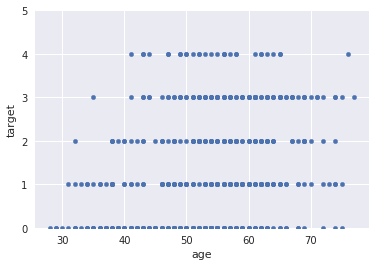

In [304]:
var = 'age'
data = pd.concat([dataset['target'], dataset[var]], axis=1)
data.plot.scatter(x=var, y='target', ylim=(0,5));


count    617.000000
mean       0.920583
std        0.270607
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: pain location, dtype: float64

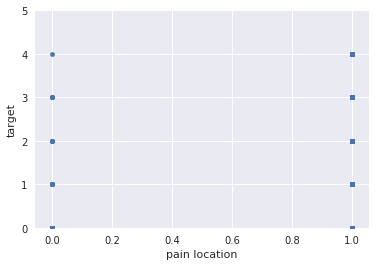

In [305]:
var = 'pain location'
data = pd.concat([dataset['target'], dataset[var]], axis=1)
# print dataset[var]
data.plot.scatter(x=var, y='target', ylim=(0,5));

dataset[var].describe()


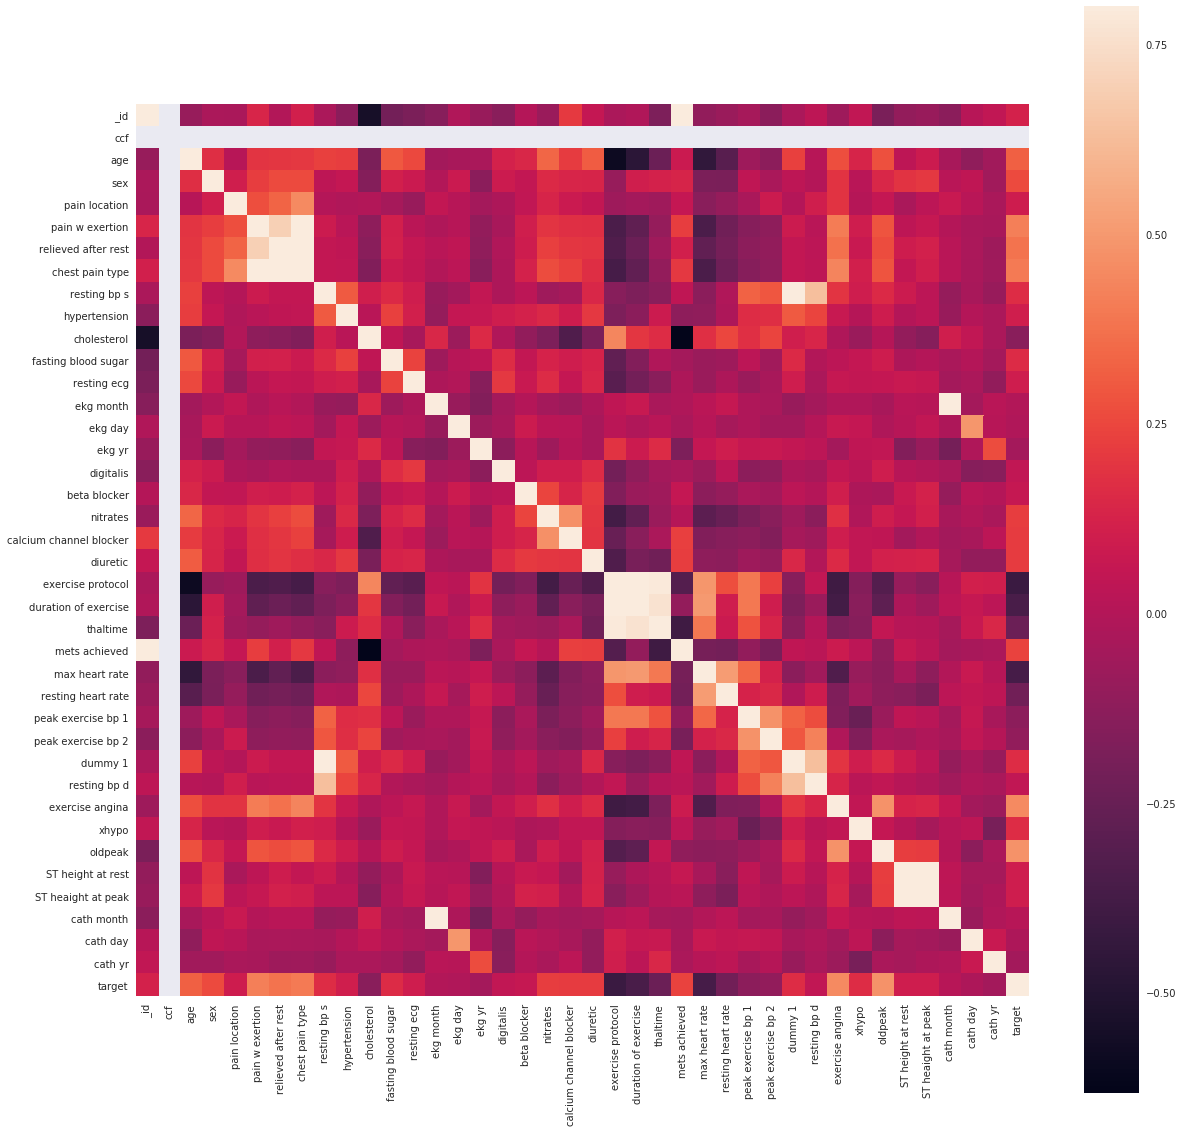

In [306]:
corrmat = dataset.corr()
f ,ax =  plt.subplots(figsize=(20,20)) #template to place the data
sns.heatmap(corrmat,vmax=.8,square=True);

In [248]:
# total = df_train.isnull().sum().sort_values(ascending=False)
# percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(60)

In [307]:
metaset = dataset[['cath yr','cath month','max heart rate','resting heart rate','exercise protocol','duration of exercise','thaltime','cholesterol','hypertension','pain location','target' ]]


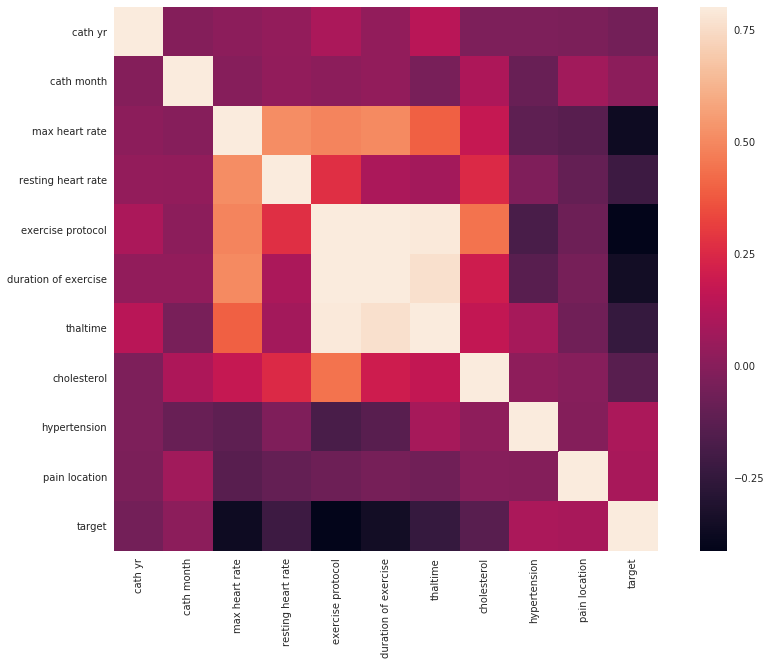

In [308]:
corrmat = metaset.corr()
f ,ax =  plt.subplots(figsize=(15,10)) #template to place the data
sns.heatmap(corrmat,vmax=.8,square=True);

In [309]:
metaset.head()

,cath yr,cath month,max heart rate,resting heart rate,exercise protocol,duration of exercise,thaltime,cholesterol,hypertension,pain location,target
0,84.0,12.0,172.0,86.0,150.0,18.0,NaN,289.0,0.0,1,0
1,84.0,11.0,156.0,100.0,NaN,10.0,9.0,180.0,1.0,1,1
2,84.0,11.0,98.0,58.0,100.0,10.0,NaN,283.0,0.0,1,0
3,84.0,9.0,108.0,54.0,50.0,5.0,4.0,214.0,0.0,1,3
4,84.0,7.0,122.0,74.0,25.0,2.0,NaN,NaN,0.0,1,0


In [310]:
metaset = metaset[['max heart rate','cholesterol','pain location','cath yr','exercise protocol','target']]
total = metaset.isnull().sum().sort_values(ascending=False)
percent = (metaset.isnull().sum()/metaset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

metaset.head()


,max heart rate,cholesterol,pain location,cath yr,exercise protocol,target
0,172.0,289.0,1,84.0,150.0,0
1,156.0,180.0,1,84.0,NaN,1
2,98.0,283.0,1,84.0,100.0,0
3,108.0,214.0,1,84.0,50.0,3
4,122.0,NaN,1,84.0,25.0,0


In [311]:
my_imputer = Imputer()
imputed_df = my_imputer.fit_transform(df_one)
# imputed_X_test = my_imputer.transform(test)

imputed_df

array([[ 172.        ,  289.        ,    1.        ,   84.        ,
         150.        ,    0.        ],
       [ 156.        ,  180.        ,    1.        ,   84.        ,
          57.22970297,    1.        ],
       [  98.        ,  283.        ,    1.        ,   84.        ,
         100.        ,    0.        ],
       ..., 
       [ 100.        ,  223.        ,    1.        ,   86.        ,
           5.        ,    2.        ],
       [ 131.04270463,  385.        ,    1.        ,   83.        ,
          57.22970297,    0.        ],
       [  93.        ,  254.        ,    1.        ,   83.        ,
           1.        ,    1.        ]])

In [312]:
metaset = pd.DataFrame(data=imputed_df    # values
              ,columns={'cath yr','max heart rate',
       'exercise protocol','cholesterol', 'pain location', 'target'}) 
# one.rename(columns={'0': 'cath yr'}, inplace=True)
metaset.head()

,target,max heart rate,cath yr,exercise protocol,pain location,cholesterol
0,172.0,289.000000,1.0,84.0,150.000000,0.0
1,156.0,180.000000,1.0,84.0,57.229703,1.0
2,98.0,283.000000,1.0,84.0,100.000000,0.0
3,108.0,214.000000,1.0,84.0,50.000000,3.0
4,122.0,174.579216,1.0,84.0,25.000000,0.0


In [313]:
metaset.rename(index=str,columns={'cath yr':'pain location','max heart rate':'cholesterol','exercise protocol':'cath yr'
       ,'cholesterol':'target', 'pain location':'exercise protocol', 'target':'max heart rate'})

,max heart rate,cholesterol,pain location,cath yr,exercise protocol,target
0,172.000000,289.000000,1.0,84.0,150.000000,0.0
1,156.000000,180.000000,1.0,84.0,57.229703,1.0
2,98.000000,283.000000,1.0,84.0,100.000000,0.0
3,108.000000,214.000000,1.0,84.0,50.000000,3.0
4,122.000000,174.579216,1.0,84.0,25.000000,0.0
5,170.000000,339.000000,1.0,84.0,175.000000,0.0
6,170.000000,237.000000,0.0,84.0,100.000000,0.0
7,142.000000,208.000000,1.0,84.0,175.000000,0.0
8,130.000000,207.000000,1.0,85.0,125.000000,1.0
9,120.000000,284.000000,1.0,85.0,75.000000,0.0


In [314]:
total = metaset.isnull().sum().sort_values(ascending=False)
percent = (one.isnull().sum()/one.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
cholesterol,0,0.0
pain location,0,0.0
exercise protocol,0,0.0
cath yr,0,0.0
max heart rate,0,0.0
target,0,0.0


In [315]:
one1 = metaset
one1 = one1.rename(index=str,columns={'cath yr':'pain location','max heart rate':'cholesterol','exercise protocol':'cath yr'
       ,'cholesterol':'target', 'pain location':'exercise protocol', 'target':'max heart rate'})
one1.head()

,max heart rate,cholesterol,pain location,cath yr,exercise protocol,target
0,172.0,289.000000,1.0,84.0,150.000000,0.0
1,156.0,180.000000,1.0,84.0,57.229703,1.0
2,98.0,283.000000,1.0,84.0,100.000000,0.0
3,108.0,214.000000,1.0,84.0,50.000000,3.0
4,122.0,174.579216,1.0,84.0,25.000000,0.0


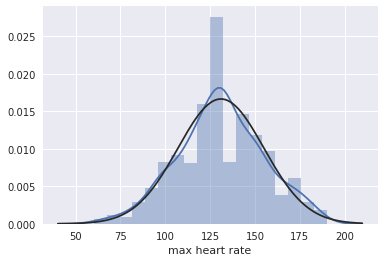

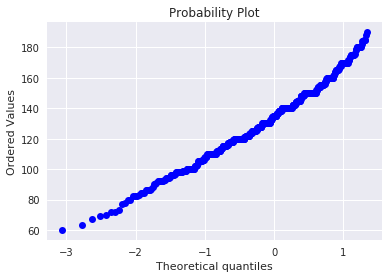

In [316]:
sns.distplot(one1['max heart rate'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['max heart rate'], plot=plt)

In [317]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(one1)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.head()

norml = df_normalized.rename(index=str,columns={2:'pain location',1:'cholesterol',3:'cath yr'
       ,5:'target', 4:'exercise protocol', 0:'max heart rate'})
norml.head()


,max heart rate,cholesterol,pain location,cath yr,exercise protocol,target
0,0.861538,0.479270,1.0,0.965116,0.748744,0.00
1,0.738462,0.298507,1.0,0.965116,0.282561,0.25
2,0.292308,0.469320,1.0,0.965116,0.497487,0.00
3,0.369231,0.354892,1.0,0.965116,0.246231,0.75
4,0.476923,0.289518,1.0,0.965116,0.120603,0.00


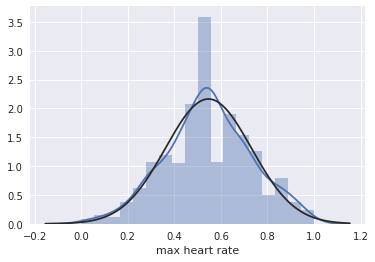

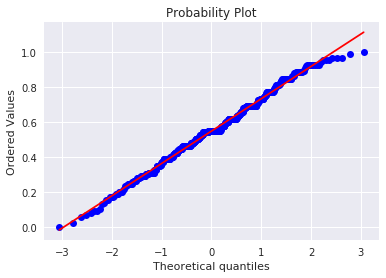

In [318]:
sns.distplot(norml['max heart rate'], fit=norm);
fig = plt.figure()
res = stats.probplot(norml['max heart rate'], plot=plt)

In [321]:
dumies = pd.get_dummies(norml['target'])
df = pd.concat([norml,dumies], axis=1)

In [323]:
df.head()


,max heart rate,cholesterol,pain location,cath yr,exercise protocol,target,0.0,0.25,0.5,0.75,1.0
0,0.861538,0.479270,1.0,0.965116,0.748744,0.00,1,0,0,0,0
1,0.738462,0.298507,1.0,0.965116,0.282561,0.25,0,1,0,0,0
2,0.292308,0.469320,1.0,0.965116,0.497487,0.00,1,0,0,0,0
3,0.369231,0.354892,1.0,0.965116,0.246231,0.75,0,0,0,1,0
4,0.476923,0.289518,1.0,0.965116,0.120603,0.00,1,0,0,0,0


In [325]:
df.to_csv('processed_dataset.csv', sep='\t', encoding='utf-8')